In [1]:
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Conv2D, Flatten, MaxPooling2D, BatchNormalization, \
SpatialDropout2D, GlobalMaxPooling2D, Input, LeakyReLU, AveragePooling2D, MaxPool2D, Concatenate, Lambda
from tensorflow.keras.utils import Sequence
import pandas as pd
import numpy as np
import os
import random
import cv2

import pickle

random.seed(30)

INPUT_FOLDER = 'C:/Users/alexa/___Licenta_v2/dataset/train/'
OUTPUT_FOLDER = 'D:/Licenta/new_try_kaggle/cnn_models/'
OUTPUT_FOLDER_TB = 'D:/Licenta/new_try_kaggle/cnn_models/tensor_boards/'

train_samples = os.listdir(INPUT_FOLDER)
train_samples.sort()

random.shuffle(train_samples)

labels_df = pd.read_csv('D:/Licenta/new_try_kaggle/train_labels.csv', index_col=0)
labels_df['label'] = labels_df['label'].astype(object) 

In [2]:
partition = dict()
all_labels = dict()
partition['train'] = train_samples[:80000]
partition['validate'] = train_samples[80000:100000]
partition['test'] = train_samples[100000:]

all_cancer = list()

for sample in train_samples:
    
    label = labels_df.get_value(sample[:-4], 'label')
    all_labels[sample] = label

    
train_cancer = 0
train_non_cancer = 0
validate_cancer = 0
validate_non_cancer = 0
test_cancer = 0
test_non_cancer = 0

for key in partition['train']:
    if all_labels[key] == 1:
        train_cancer+=1
    else:
        train_non_cancer+=1
        
print(f"cancer-{repr(train_cancer)}-non_cancer-{repr(train_non_cancer)}")

for key in partition['validate']:
    if all_labels[key] == 1:
        validate_cancer+=1
    else:
        validate_non_cancer+=1
        
print(f"cancer-{repr(validate_cancer)}-non_cancer-{repr(validate_non_cancer)}")

for key in partition['test']:
    if all_labels[key] == 1:
        test_cancer+=1
    else:
        test_non_cancer+=1
        
print(f"cancer-{repr(test_cancer)}-non_cancer-{repr(test_non_cancer)}")

C:\Users\alexa\AppData\Local\conda\conda\envs\licentav2\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


cancer-32510-non_cancer-47490
cancer-7995-non_cancer-12005
cancer-3820-non_cancer-5600


Text(0, 0.5, 'numar de imagini')

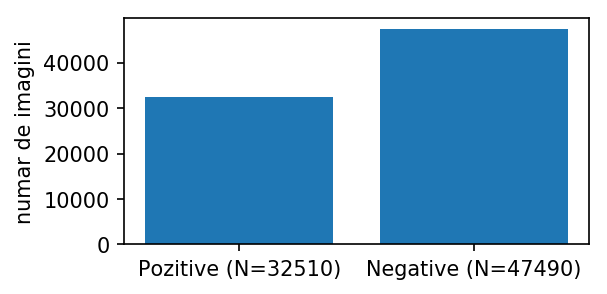

In [5]:
fig = plt.figure(figsize=(4, 2),dpi=150)
plt.bar([1,0], [train_non_cancer, train_cancer]); #plot a bar chart of the label frequency
plt.xticks([1,0],["Negative (N={})".format(train_non_cancer),"Pozitive (N={})".format(train_cancer)]);
plt.ylabel("numar de imagini")

In [6]:
r_p = 0
g_p = 0
b_p = 0
greyscale_p = 0

r_n = 0
g_n = 0
b_n = 0
greyscale_n = 0


total_pixels_p = 44325 *32 *32
total_pixels_n = 65095 *32 *32

r_total_p = 0
g_total_p = 0
b_total_p = 0

r_total_c = 0
g_total_c = 0
b_total_c = 0


i = 0
for sample in partition['train']:
    i+=1
    if i%10000 == 0:
        print(i)
    
    if all_labels[sample] == 1:
        img_array_greyscale = cv2.imread(os.path.join(INPUT_FOLDER, sample),cv2.IMREAD_GRAYSCALE)
        img_array_greyscale = img_array_greyscale[32:64,32:64,]
        temp_greyscale = img_array_greyscale.sum()
        
        img_array_rgb = cv2.imread(os.path.join(INPUT_FOLDER, sample))
        img_array_rgb = img_array_rgb[32:64,32:64,]
    
        greyscale_p +=temp_greyscale
        r_p += img_array_rgb[:,:,0].sum()
        g_p += img_array_rgb[:,:,1].sum()
        b_p += img_array_rgb[:,:,2].sum()
    else:
        img_array_greyscale = cv2.imread(os.path.join(INPUT_FOLDER, sample),cv2.IMREAD_GRAYSCALE)
        img_array_greyscale = img_array_greyscale[32:64,32:64,]
        temp_greyscale = img_array_greyscale.sum()
        
        img_array_rgb = cv2.imread(os.path.join(INPUT_FOLDER, sample))
        img_array_rgb = img_array_rgb[32:64,32:64,]
    
        greyscale_n +=temp_greyscale
        r_n += img_array_rgb[:,:,0].sum()
        g_n += img_array_rgb[:,:,1].sum()
        b_n += img_array_rgb[:,:,2].sum()

r_n /= 255.0
g_n /= 255.0
b_n /= 255.0

r_p /= 255.0
g_p /= 255.0
b_p /= 255.0

r_n /= total_pixels_n
g_n /= total_pixels_n
b_n /= total_pixels_n

r_p /= total_pixels_n
g_p /= total_pixels_n
b_p /= total_pixels_n

greyscale_n /= 255.0
greyscale_p /= 255.0


greyscale_n /= total_pixels_n
greyscale_p /= total_pixels_p

10000
20000
30000
40000
50000
60000
70000
80000


0.5112427613337369 0.34331368291949627


Text(0, 0.5, 'numar de imagini')

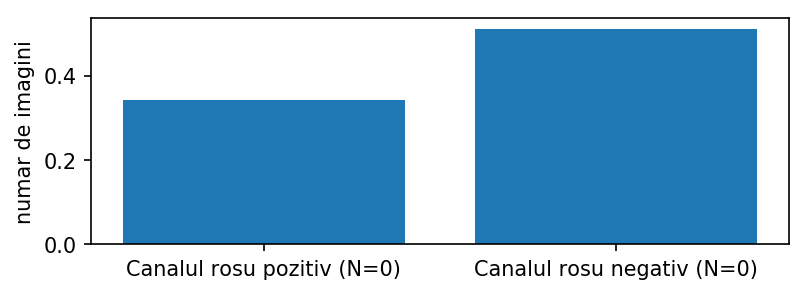

In [7]:
print(r_n, r_p)

fig = plt.figure(figsize=(6, 2),dpi=150)
plt.bar([1,0], [r_n, r_p]); #plot a bar chart of the label frequency
plt.xticks([1,0],["Canalul rosu negativ (N={})".format(int(r_n)),"Canalul rosu pozitiv (N={})".format(int(r_p))]);
plt.ylabel("numar de imagini")

0.4175379414598046 0.25132023071201365


Text(0, 0.5, 'numar de imagini')

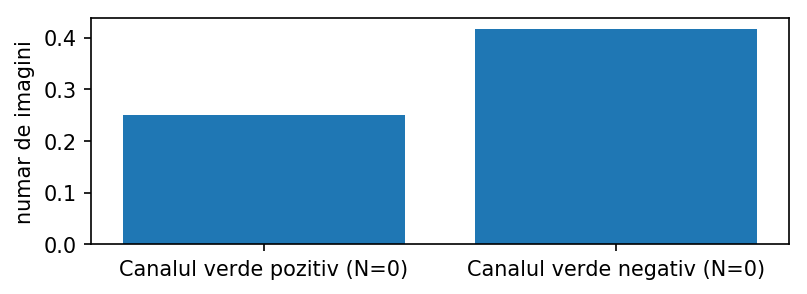

In [8]:
print(g_n, g_p)

fig = plt.figure(figsize=(6, 2),dpi=150)
plt.bar([1,0], [g_n, g_p]); #plot a bar chart of the label frequency
plt.xticks([1,0],["Canalul verde negativ (N={})".format(int(g_n)),"Canalul verde pozitiv (N={})".format(int(g_p))]);
plt.ylabel("numar de imagini")

0.516307594579905 0.3460122315810301


Text(0, 0.5, 'numar de imagini')

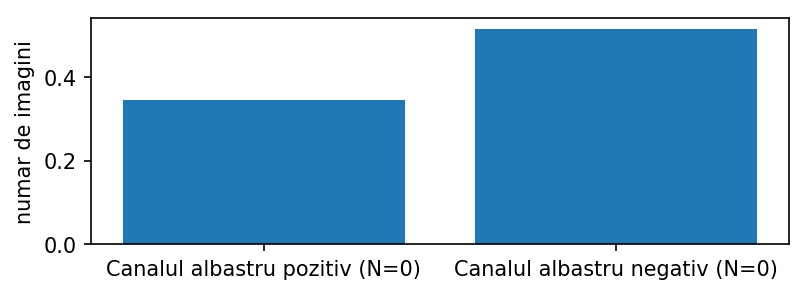

In [9]:
print(b_n, b_p)

fig = plt.figure(figsize=(6, 2),dpi=150)
plt.bar([1,0], [b_n, b_p]); #plot a bar chart of the label frequency
plt.xticks([1,0],["Canalul albastru negativ (N={})".format(int(b_n)),"Canalul albastru pozitiv (N={})".format(int(b_p))]);
plt.ylabel("numar de imagini")

0.4577732131742973 0.42610215787880296


Text(0, 0.5, 'numar de imagini')

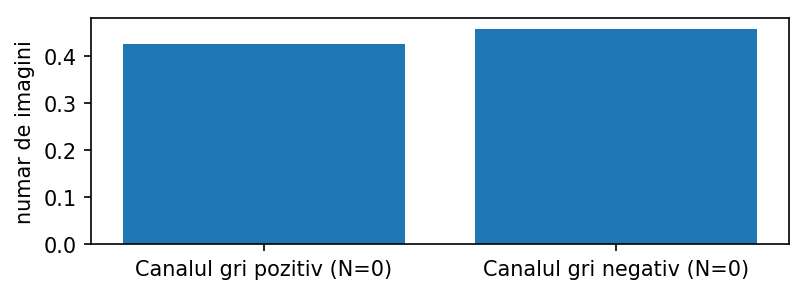

In [10]:
print(greyscale_n, greyscale_p)

fig = plt.figure(figsize=(6, 2),dpi=150)
plt.bar([1,0], [greyscale_n, greyscale_p]); #plot a bar chart of the label frequency
plt.xticks([1,0],["Canalul gri negativ (N={})".format(int(greyscale_n)),"Canalul gri pozitiv (N={})".format(int(greyscale_p))]);
plt.ylabel("numar de imagini")

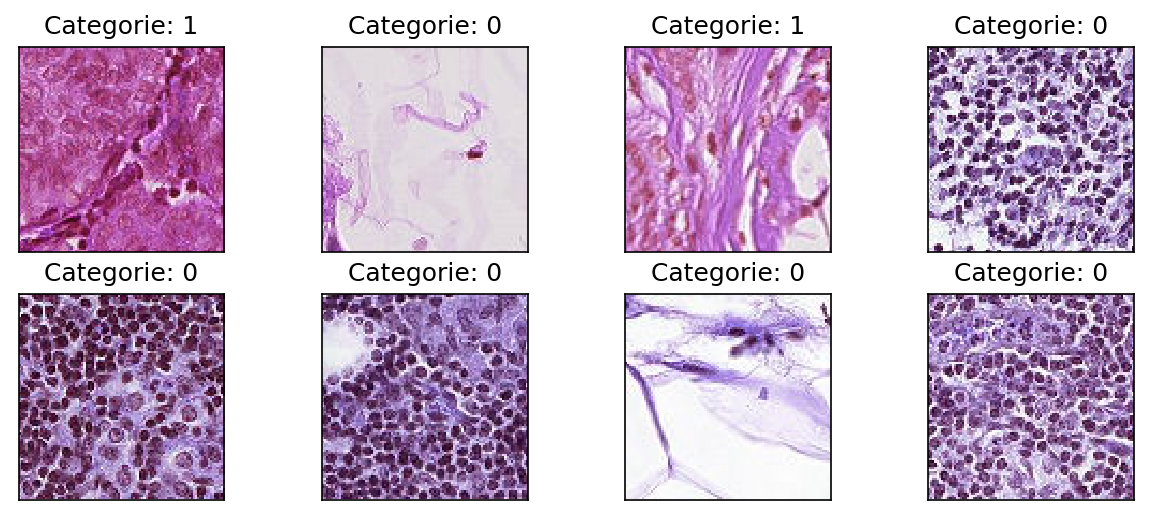

In [33]:
fig = plt.figure(figsize=(10, 4), dpi=150)
for plotNr, num_sample in enumerate(np.random.randint(0,10000,8)):
    img_array = cv2.imread(os.path.join(INPUT_FOLDER, train_samples[num_sample]))
    ax = fig.add_subplot(2, 8//2, plotNr+1, xticks=[], yticks=[]) #add subplots
    plt.imshow(img_array) #plot image
    ax.set_title('Categorie: ' + str(all_labels[train_samples[num_sample]])) #show the label corresponding to the image